In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
def Rsquare(list_e, list_t):
    return 1 - chisquare(list_e, list_t) / np.sum((list_e - np.average(list_e))**2)
def chisquare(list_e, list_t):
    return np.sum((list_e - list_t)**2/list_t)
def Gtest(list_e, list_t, cut):
    return 2*np.sum(list_t[list_t>cut]-list_e[list_t>cut]+list_e[list_t>cut]*np.log(list_e[list_t>cut]/list_t[list_t>cut]))

In [7]:
L = 0.02

lbl1=['trial', 'alpha', 'X', 'Q_0', 'Q_30', 'Q_45', 'Q_60', 'H_30', 'H_45', 'H_60']
lbl2=['exp', 'I', 'B', 'phi', 'lambda']

p1 = pd.read_excel('PE3_1_plate.xlsx', names=['trial', 'alpha', 'X', 'Q_0', 'Q_30', 
                                              'Q_45', 'Q_60', 'H_30', 'H_45', 'H_60'])
p2 = pd.read_excel('PE3_2_faraday.xlsx', names=['exp', 'I', 'B', 'phi', 'wl'])

In [8]:
Imax = np.zeros(3)
Imin = np.zeros(3)
for i in range (3):
    midmax=[]
    midmin=[]
    for j in range (2, 10):
        midmax.append(p1[lbl1[j]][p1.trial==i+1])
        midmin.append(p1[lbl1[j]][p1.trial==i+1])
    Imax[i] = np.max(midmax)
    Imin[i] = np.min(midmin)
print(Imax, Imin)

[4.24  0.078 0.394] [0.013 0.002 0.235]


In [61]:
np.max(Iserr)

0.15319194514131165

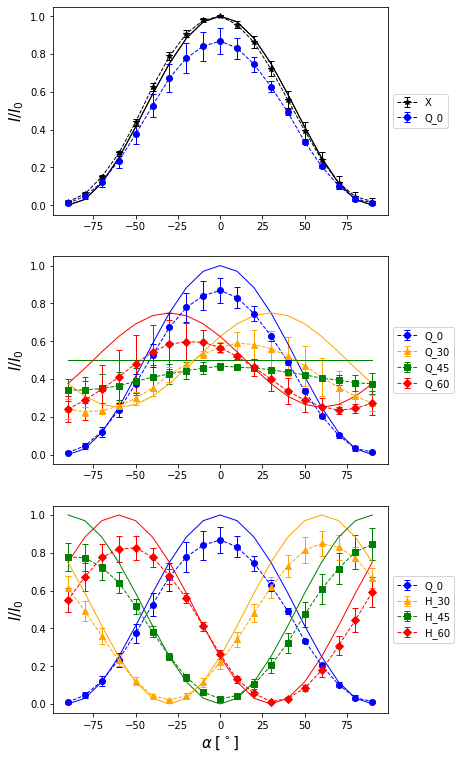

In [9]:
alpha = [-90+10*i for i in range (19)]
Is = []
Iserr = []
for i in range (2, 10):
    Is.append(np.average(np.array(
        [np.array((p1[lbl1[i]][p1.trial==1]-Imin[0])/(Imax[0]-Imin[0])),
         np.array((p1[lbl1[i]][p1.trial==2]-Imin[1])/(Imax[1]-Imin[1])), 
         np.array((p1[lbl1[i]][p1.trial==3]-Imin[2])/(Imax[2]-Imin[2]))]), axis=0))
    Iserr.append(np.std(np.array(
        [np.array((p1[lbl1[i]][p1.trial==1]-Imin[0])/(Imax[0]-Imin[0])),
         np.array((p1[lbl1[i]][p1.trial==2]-Imin[1])/(Imax[1]-Imin[1])), 
         np.array((p1[lbl1[i]][p1.trial==3]-Imin[2])/(Imax[2]-Imin[2]))]), 
                        ddof=1, axis=0)/np.sqrt(3))
    
fig, ax = plt.subplots(3, 1, figsize=(6, 13))
color = ['b', 'orange', 'g', 'r', 'k']
mk = ['o', '^', 's', 'D', '*']

index = 0
for i in range (2):
    ax[0].errorbar(alpha, Is[i], yerr=Iserr[i], 
                   marker=mk[-1+i], linestyle="--", color=color[-1+i], linewidth=1, capsize=3, label=lbl1[i+2])
    ax[0].plot(alpha, np.cos(np.deg2rad(alpha))**2, 'k-', linewidth=1)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i in range (1,5):
    ax[1].errorbar(alpha, Is[i], yerr=Iserr[i], 
                   marker=mk[-1+i], linestyle="--", color=color[i-1], linewidth=1, capsize=3, label=lbl1[i+2])
for i in [0, np.pi/6, np.pi/4, np.pi/3]:
    ax[1].plot(alpha, (np.cos(i)*np.cos(np.deg2rad(alpha)-i))**2+(np.sin(i)*np.sin(np.deg2rad(alpha)-i))**2, 
               '-', color=color[index], linewidth=1)
    index += 1
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

index = 0
for i in [1,5,6,7]:
    ax[2].errorbar(alpha, Is[i], yerr=Iserr[i], 
                   marker=mk[index], linestyle="--", color=color[index], linewidth=1, capsize=3, label=lbl1[i+2])
    index += 1
index = 0
for i in [0, np.pi/6, np.pi/4, np.pi/3]:
    ax[2].plot(alpha, (np.cos(2*i-np.deg2rad(alpha)))**2, 
               '-', color=color[index], linewidth=1)
    index += 1
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range (3): ax[i].set_ylabel('$I/I_0$', fontsize=15)
ax[2].set_xlabel('$\\alpha\; [^\circ]$', fontsize=15)
plt.savefig('3_1_1.png', dpi=800, bbox_inches='tight')
plt.show()

In [53]:
import scipy.stats as scs
Xg = Gtest((p1.X-Imin[p1.trial-1])/(Imax[p1.trial-1]-Imin[p1.trial-1]), np.cos(np.deg2rad(p1.alpha))**2, 0.001)
print("X : ", Xg, scs.distributions.chi2.sf(Xg, 56))
phi = [0, np.pi/6, np.pi/4, np.pi/3]
for i in range (4):
    Qg = Gtest((p1[lbl1[i+3]]-Imin[p1.trial-1])/(Imax[p1.trial-1]-Imin[p1.trial-1]), 
                        ((np.cos(phi[i])*np.cos(np.deg2rad(p1.alpha)-phi[i]))**2
                          +(np.sin(phi[i])*np.sin(np.deg2rad(p1.alpha)-phi[i]))**2), 0.001)
    print(lbl1[i+3], ":", Qg, scs.distributions.chi2.sf(Qg, 56))
for i in range (1, 4):
    Hg = Gtest((p1[lbl1[i+6]]-Imin[p1.trial-1])/(Imax[p1.trial-1]-Imin[p1.trial-1]),
                          (np.cos(2*phi[i]-np.deg2rad(p1.alpha)))**2, 0.001)
    print(lbl1[i+6], ":", Hg, scs.distributions.chi2.sf(Hg, 56))

X :  0.45283989142615105 1.0
Q_0 : 1.0025003914103643 1.0
Q_30 : 2.9744060327206547 1.0
Q_45 : 1.9588036148157228 1.0
Q_60 : 4.153656940371629 1.0
H_30 : 1.2605694563766208 1.0
H_45 : 1.7506381400996172 1.0
H_60 : 1.7118267619145975 1.0


 
24.44 x + 15.92 0.3373541388431566
0.978439738558262


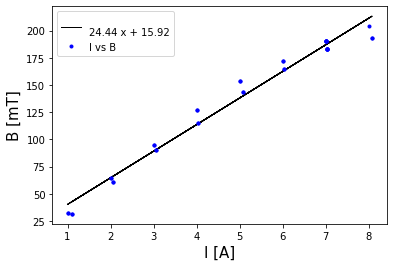

<Figure size 432x288 with 0 Axes>

In [425]:
z = np.poly1d(np.polyfit(p2.I, p2.B, 1))
print(z, chisquare(p2.B, z(p2.I))/(np.var(p2.I) * len(p2)**2))
print(Rsquare(p2.B, z(p2.I)))

plt.plot(p2.I, z(p2.I), 'k-', linewidth=1, label=z)
plt.plot(p2.I, p2.B, 'b.', label='I vs B')
plt.xlabel('I [A]', fontsize=15)
plt.ylabel('B [mT]', fontsize=15)
plt.legend()
plt.savefig('3_2_1.png', dpi=800)
plt.figure(figsize=(6, 4))
plt.show()

 
0.06438 x - 0.1105 7.017361858652454e-07
0.9988160824143876
 
0.1134 x - 1.742 6.530362380608687e-05
0.9609670103015541


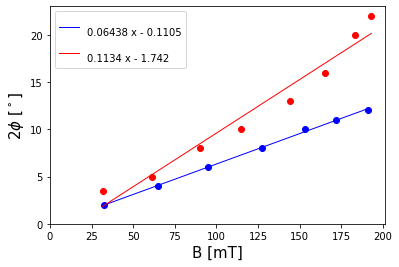

<Figure size 432x288 with 0 Axes>

V = 1609.3777476947932 +- 0.017543404646631136
V = 2835.2540134433752 +- 1.6325905951521715


In [424]:
p2_21 = p2[p2.exp==1.8]
p2_22 = p2[p2.exp==2.2]
z1 = np.poly1d(np.polyfit(p2_21.B, p2_21.phi, 1))
z2 = np.poly1d(np.polyfit(p2_22.B, p2_22.phi, 1))
print(z1, chisquare(p2_21.phi, z1(p2_21.B))/(np.var(p2_21.B) * len(p2_21)**2))
print(Rsquare(p2_21.phi, z1(p2_21.B)))
print(z2, chisquare(p2_22.phi, z2(p2_22.B))/(np.var(p2_22.B) * len(p2_22)**2))
print(Rsquare(p2_22.phi, z2(p2_22.B)))

plt.plot(p2_21.B, z1(p2_21.B), 'b-', linewidth=1, label=z1)
plt.plot(p2_21.B, p2_21.phi, 'bo')
plt.plot(p2_22.B, z2(p2_22.B), 'r-', linewidth=1, label=z2)
plt.plot(p2_22.B, p2_22.phi, 'ro')
plt.ylabel('2$\phi$ [$^\circ$]', fontsize=15)
plt.xlabel('B [mT]', fontsize=15)
plt.legend()
plt.ylim(0)
plt.xlim(0)
plt.savefig('3_2_2.png', dpi=800)
plt.figure(figsize=(6, 4))
plt.show()

print("V =", z1[1]/(2*L)*1000, "+-", 
      chisquare(p2_21.phi, z1(p2_21.B))/(np.var(p2_21.B) * len(p2_21)**2 * L * 2)*1000 )
print("V =", z2[1]/(2*L)*1000, "+-", 
      chisquare(p2_22.phi, z2(p2_22.B))/(np.var(p2_22.B) * len(p2_22)**2 * L * 2)*1000 )

 
1.652e-11 x - 20.01 4.790326591938047e-26
0.9993152620990502
 
4.003e-11 x - 82.21 5.768894289623204e-25
0.9986663486319317


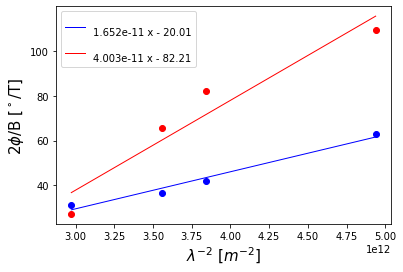

<Figure size 432x288 with 0 Axes>

In [57]:
p2_31 = p2[p2.exp==2.8]
p2_32 = p2[p2.exp==3.2]

z1 = np.poly1d(np.polyfit(10**(18)/(p2_31.wl)**2, p2_31.phi/p2_31.B*1000, 1))
z2 = np.poly1d(np.polyfit(10**(18)/(p2_32.wl)**2, p2_32.phi/p2_32.B*1000, 1))
print(z1, chisquare(p2_31.phi/p2_31.B*1000, z1(10**(18)/(p2_31.wl)**2))/(np.var(10**(18)/(p2_31.wl)**2) * len(p2_31)**2))
print(Rsquare(p2_31.phi/p2_31.B*1000, z1(10**(18)/(p2_31.wl)**2)))
print(z2, chisquare(p2_32.phi/p2_32.B*1000, z2(10**(18)/(p2_32.wl)**2))/(np.var(10**(18)/(p2_32.wl)**2) * len(p2_32)**2))
print(Rsquare(p2_32.phi/p2_32.B*1000, z2(10**(18)/(p2_32.wl)**2)))


plt.plot(10**(18)/(p2_31.wl)**2, p2_31.phi/p2_31.B*1000, 'bo')
plt.plot(10**(18)/(p2_32.wl)**2, p2_32.phi/p2_32.B*1000, 'ro')
plt.plot(10**(18)/(p2_31.wl)**2, z1(10**(18)/(p2_31.wl)**2), 'b-', linewidth=1, label=z1)
plt.plot(10**(18)/(p2_32.wl)**2, z2(10**(18)/(p2_32.wl)**2), 'r-', linewidth=1, label=z2)

plt.ylabel('2$\phi$/B [$^\circ$/T]', fontsize=15)
plt.xlabel('$\lambda^{-2}$ [$m^{-2}$]', fontsize=15)
plt.legend()
plt.savefig('3_2_3.png', dpi=800)
plt.figure(figsize=(6, 4))
plt.show()

In [58]:
q_e = 1.60217662e-19
m_e = 9.10938356e-31

print(z1[1]*(3*10**8)**2 / (L * 1.8*10**(-14)))
print(chisquare(p2_31.phi/p2_31.B*1000, z1(10**(18)/(p2_31.wl)**2))/(np.var(10**(18)/(p2_31.wl)**2) * len(p2_31)**2) * (3*10**8)**2 / (L * 1.8*10**(-14)))
print(z2[1]*(3*10**8)**2 / (L * 1.8*10**(-14)))
print(chisquare(p2_32.phi/p2_32.B*1000, z2(10**(18)/(p2_32.wl)**2))/(np.var(10**(18)/(p2_32.wl)**2) * len(p2_32)**2) * (3*10**8)**2 / (L * 1.8*10**(-14)))
print(format(q_e/m_e, "10e"))

4.129593019435234e+21
11975816.479845116
1.0006294092326015e+22
144222357.24058008
1.758820e+11
